## Fifa team formation

A new football club named ‘Brussels United FC’ has just been inaugurated. This club does not have a team yet. The team is looking to hire players for their roster. 

The aim of this analysis is to help the management to form a footbal team for the new club.

In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [251]:
fifa = pd.read_csv('fifa.csv') 

In [252]:
fifa.head(5)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [253]:
fifa_metadata = pd.read_csv('fifa_+variable_information.csv')

In [ ]:
fifa_metadata

* There are 42 numerical columns and 18 categorical columns

In [255]:
fifa.describe()

,ID,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,25.122206,66.238699,71.307299,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,29965.244204,4.669943,6.908930,6.136496,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,16.000000,46.000000,48.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221759.000000,25.000000,66.000000,71.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236529.500000,28.000000,71.000000,75.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


* This shows the summary statistics of all the numerical features

## Data Preprocessing:

#### Redundant columns:

There are some columns present which provides redundant information. Hence those columns are dropped.

In [256]:
rel = fifa['Release Clause']
fifa = fifa.iloc[:,1:25]

In [257]:
fifa = pd.concat((fifa,rel),axis = 1)

In [258]:
fifa.drop(['Photo','Flag','Club Logo','Body Type','Jersey Number','Loaned From'],inplace = True,axis = 1)

In [259]:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,5.0,4.0,4.0,Medium/ Medium,RF,"Jul 1, 2004",2021,5'7,159lbs,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,5.0,4.0,5.0,High/ Low,ST,"Jul 10, 2018",2022,6'2,183lbs,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,5.0,5.0,5.0,High/ Medium,LW,"Aug 3, 2017",2022,5'9,150lbs,€228.1M
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,4.0,3.0,1.0,Medium/ Medium,GK,"Jul 1, 2011",2020,6'4,168lbs,€138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,4.0,5.0,4.0,High/ High,RCM,"Aug 30, 2015",2023,5'11,154lbs,€196.4M


In [260]:
print('No of Records:',fifa.shape[0],'\nNo of Features',fifa.shape[1])

No of Records: 18207 
No of Features 19


#### Columns Treatment

For further analysis ,the data type of the information present in the columns are not suitable. 
Hence it should be treated and cleaned.

It includes both __null value__ treatment and __type conversion__

In [261]:
fifa.isnull().sum()

Name                           0
Age                            0
Nationality                    0
Overall                        0
Potential                      0
Club                         241
Value                          0
Wage                           0
Preferred Foot                48
International Reputation      48
Weak Foot                     48
Skill Moves                   48
Work Rate                     48
Position                      60
Joined                      1553
Contract Valid Until         289
Height                        48
Weight                        48
Release Clause              1564
dtype: int64

In [262]:
fifa['Club'].fillna('NA',inplace = True)

In [263]:
fifa.isnull().sum()

Name                           0
Age                            0
Nationality                    0
Overall                        0
Potential                      0
Club                           0
Value                          0
Wage                           0
Preferred Foot                48
International Reputation      48
Weak Foot                     48
Skill Moves                   48
Work Rate                     48
Position                      60
Joined                      1553
Contract Valid Until         289
Height                        48
Weight                        48
Release Clause              1564
dtype: int64

In [264]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      18207 non-null  object 
 1   Age                       18207 non-null  int64  
 2   Nationality               18207 non-null  object 
 3   Overall                   18207 non-null  int64  
 4   Potential                 18207 non-null  int64  
 5   Club                      18207 non-null  object 
 6   Value                     18207 non-null  object 
 7   Wage                      18207 non-null  object 
 8   Preferred Foot            18159 non-null  object 
 9   International Reputation  18159 non-null  float64
 10  Weak Foot                 18159 non-null  float64
 11  Skill Moves               18159 non-null  float64
 12  Work Rate                 18159 non-null  object 
 13  Position                  18147 non-null  object 
 14  Joined

In [265]:
fifa['Value'] = fifa['Value'].apply(lambda x: float(x[1:len(x)-1])*1000 if x[-1] == 'M' else x[1:len(x)-1])
fifa.rename(columns = {'Value':'Value in thousands'},inplace = True)
fifa['Value in thousands'].replace(r'^\s*$', '0', regex=True, inplace = True)
fifa['Value in thousands'] = fifa['Value in thousands'].astype(float)

In [266]:
fifa['Wage'] = fifa['Wage'].apply(lambda x: float(x[1:len(x)-1])*1000 if x[-1] == 'M' else x[1:len(x)-1])
fifa.rename(columns = {'Wage':'Wage in thousands'},inplace = True)
fifa['Wage in thousands'].replace(r'^\s*$', '0', regex=True, inplace = True)
fifa['Wage in thousands'] = fifa['Wage in thousands'].astype(float)

In [267]:
fifa['Joined'] = fifa['Joined'].apply(lambda x: x if x is np.nan else x[len(x)-4:len(x)])

In [268]:
fifa['Contract Valid Until'] = fifa['Contract Valid Until'].apply(lambda x: x if x is np.nan else x[len(x)-4:len(x)])

In [269]:
fifa['Height'] = fifa['Height'].apply(lambda x : x if x is np.nan else x.replace("'",'.')).astype(float)

In [270]:
fifa['Weight'] = fifa['Weight'].apply(lambda x : x if x is np.nan else x[0:3]).astype(float) 

In [271]:
fifa['Release Clause'] = fifa['Release Clause'].replace(np.nan,'0')
fifa['Release Clause'] = fifa['Release Clause'].apply(lambda x: float(x[1:len(x)-1])*1000 if x[-1] == 'M' else x[1:len(x)-1])
fifa.rename(columns = {'Release Clause':'Release Clause in thousands'},inplace = True)
fifa['Release Clause in thousands'].replace(r'^\s*$', '0', regex=True, inplace = True)
fifa['Release Clause in thousands'] = fifa['Release Clause in thousands'].astype(float)

* Cleaned the necessary columns into suitable format

##### Null Value treatment

In [272]:
fifa.isnull().sum()

Name                              0
Age                               0
Nationality                       0
Overall                           0
Potential                         0
Club                              0
Value in thousands                0
Wage in thousands                 0
Preferred Foot                   48
International Reputation         48
Weak Foot                        48
Skill Moves                      48
Work Rate                        48
Position                         60
Joined                         1553
Contract Valid Until            289
Height                           48
Weight                           48
Release Clause in thousands       0
dtype: int64

In [273]:
fifa['Preferred Foot'] = fifa['Preferred Foot'].fillna('NA')
fifa['Work Rate'] = fifa['Work Rate'].fillna('NA')
fifa['Position'] = fifa['Position'].fillna('NA')
fifa['Weak Foot'] = fifa['Weak Foot'].fillna(0.0)
fifa['International Reputation'] = fifa['International Reputation'].fillna(0.0)
fifa['Skill Moves'] = fifa['Skill Moves'].fillna(0.0)
fifa['Joined'] = fifa['Joined'].fillna(0).astype(int)
fifa['Contract Valid Until'] = fifa['Contract Valid Until'].fillna(0).astype(int)
fifa['Weight'] = fifa['Weight'].fillna(fifa['Weight'].median()).astype(float)
fifa['Height'] = fifa['Height'].fillna(fifa['Height'].median()).astype(float)

* Treated all the null values. 
* Here categroical columns are filled with __'NA'__ which represents null value.
* Numerical columns are filed with __'0'__ or __'0.0'__ which represents null value.

In [274]:
fifa.isnull().sum()

Name                           0
Age                            0
Nationality                    0
Overall                        0
Potential                      0
Club                           0
Value in thousands             0
Wage in thousands              0
Preferred Foot                 0
International Reputation       0
Weak Foot                      0
Skill Moves                    0
Work Rate                      0
Position                       0
Joined                         0
Contract Valid Until           0
Height                         0
Weight                         0
Release Clause in thousands    0
dtype: int64

***

## Data Analysis

In [275]:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value in thousands,Wage in thousands,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Joined,Contract Valid Until,Height,Weight,Release Clause in thousands
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,4.0,Medium/ Medium,RF,2004,2021,5.70,159.0,226500.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,4.0,5.0,High/ Low,ST,2018,2022,6.20,183.0,127100.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,5.0,High/ Medium,LW,2017,2022,5.90,150.0,228100.0
3,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,3.0,1.0,Medium/ Medium,GK,2011,2020,6.40,168.0,138600.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,5.0,4.0,High/ High,RCM,2015,2023,5.11,154.0,196400.0


### Distribution

Inorder to understand the distribution of the players , analysis is done on features such as Overall, Potential,Values, Release Clause,Joined,Contract Validity, Position.

##### Overall score and potential score

Text(0, 0.5, 'count')

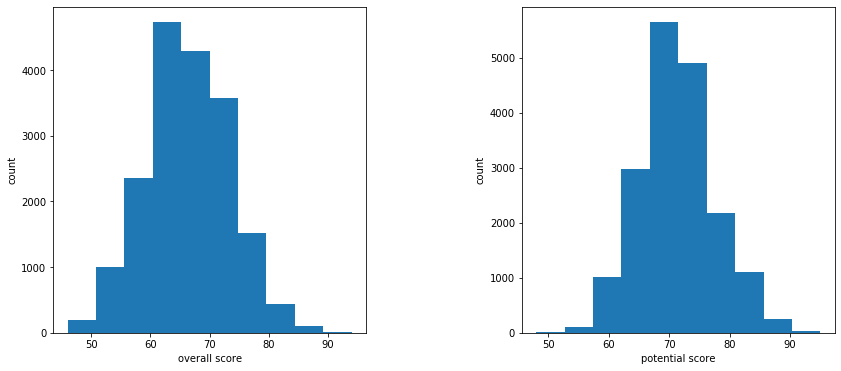

In [276]:
f,ax = plt.subplots(1,2,figsize=(14,6))
plt.subplots_adjust(wspace = 0.5)  

fifa['Overall'].plot(kind = 'hist',ax = ax[0])
ax[0].set_xlabel('overall score')
ax[0].set_ylabel('count')

fifa['Potential'].plot(kind = 'hist',ax = ax[1])
ax[1].set_xlabel('potential score')
ax[1].set_ylabel('count')

* Most of the players score lies in the range of '60 - 75'. 
* Distribution of both overall score and potential score looks similar. 

##### values and release clause

Text(0, 0.5, 'count')

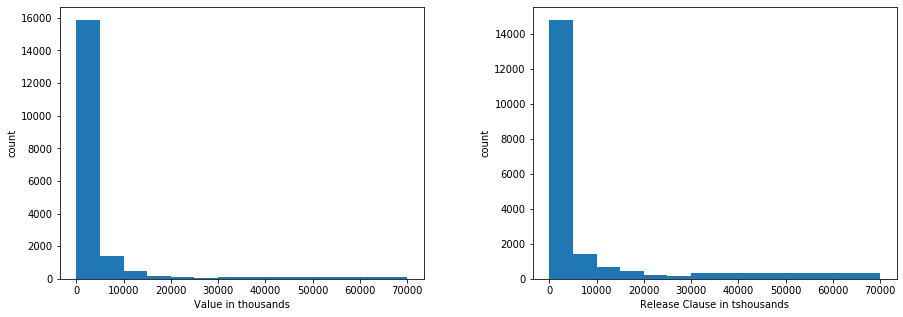

In [277]:
f,ax = plt.subplots(1,2,figsize=(15,5))
plt.subplots_adjust(wspace = 0.3)  

fifa['Value in thousands'].plot(kind = 'hist',bins = [0,5000,10000,15000,20000,25000,30000,70000],ax = ax[0])
ax[0].set_xlabel('Value in thousands')
ax[0].set_ylabel('count')

fifa['Release Clause in thousands'].plot(kind = 'hist',bins = [0,5000,10000,15000,20000,25000,30000,70000],ax = ax[1])
ax[1].set_xlabel('Release Clause in tshousands')
ax[1].set_ylabel('count')


__Value__ :  Around '15000+'  players lies in the range '0-5000' which is very huge.
Number of players whose value is in the range '5000-1000' is around '1000+' which is very less compared to previous range.

__Release Clause__: Same follows here too. Around 14000+ players lies in the range '0-5000'. 

#### Joined and contract validity

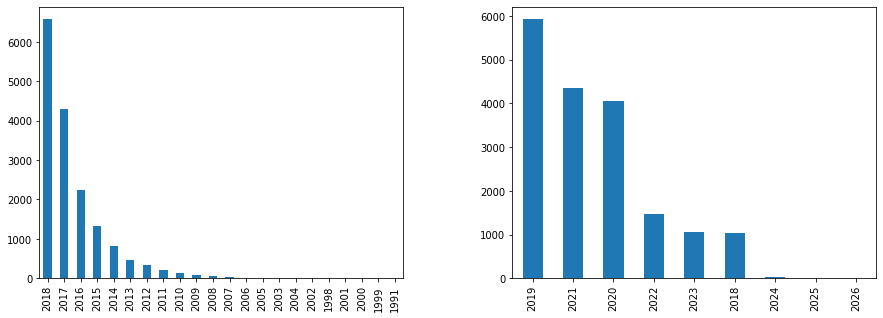

In [278]:
f,ax = plt.subplots(1,2,figsize=(15,5))
plt.subplots_adjust(wspace = 0.3) 

# since 0 represents null value , eliminating 0 b.
fifa.loc[fifa['Joined'] != 0 ,'Joined'].value_counts().plot(kind = 'bar',ax = ax[0])
fifa.loc[fifa['Contract Valid Until'] != 0 ,'Contract Valid Until'].value_counts().plot(kind = 'bar',ax = ax[1])


From the above graph,

* More players are joined during the year 2018 with the count of 6000+. Then comes 2017 with 4000+.
* since we are in 2020, we can cosider 2018 and 2019 in which the contract has ended for players. 2020 can also be taken.

##### Position

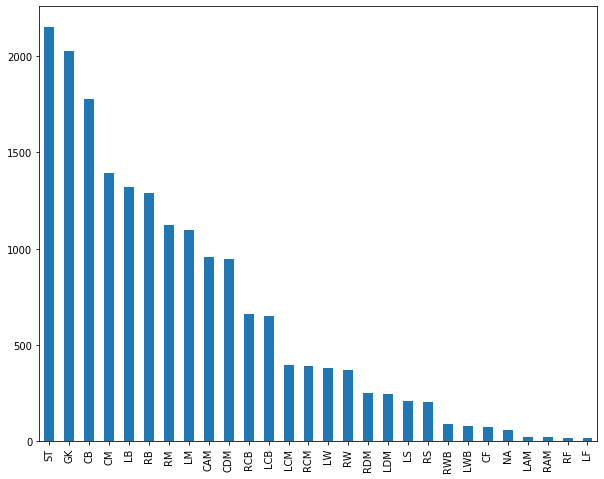

In [279]:
plt.figure(figsize = (10,8))
fifa['Position'].value_counts().plot(kind = 'bar')

* 'ST','GK','CB' positions are played by more than 1500+ players each.
* Similar to this there are some positions which is played be least players too such as 'LAM','RF','LF'.
***

### Selection of Top 20 players

After understanding the distribution of players with respect to few featues , let us get into the process of 
selecting top 20 players for the club.

#### understanding overall rating

<Figure size 720x720 with 0 Axes>

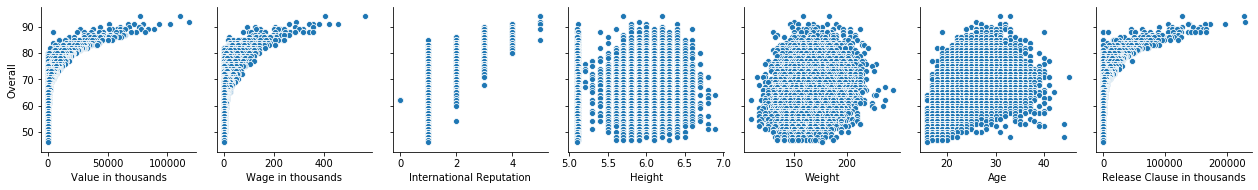

In [280]:
plt.figure(figsize = (10,10))
sns.pairplot(y_vars = 'Overall',x_vars = ['Value in thousands','Wage in thousands','International Reputation','Height','Weight','Age','Release Clause in thousands'],data = fifa)

From the pair plot , 

* Value of the player increase with repect to the overall score. Same is applicable to wage and Release Clause too.
* There are only few players with good overall rating and reputation. Also players with good overall has very less international
  reputation.
* Height ,Weight, Age seems to be normally distributed and has no effect in overall score.


#### Top 20 players

Now, top 20 players are selected based on the overall rating  whose contract period ends in 2020.

##### overall and contract validity

In [281]:
top_20_overall = fifa.sort_values('Overall',ascending = False).loc[fifa['Contract Valid Until'] == 2020,: ].head(20)
top_20_overall

,Name,Age,Nationality,Overall,Potential,Club,Value in thousands,Wage in thousands,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Joined,Contract Valid Until,Height,Weight,Release Clause in thousands
3,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,3.0,1.0,Medium/ Medium,GK,2011,2020,6.40,168.0,138600.0
5,E. Hazard,27,Belgium,91,91,Chelsea,93000.0,340.0,Right,4.0,4.0,4.0,High/ Medium,LF,2012,2020,5.80,163.0,172100.0
6,L. Modrić,32,Croatia,91,91,Real Madrid,67000.0,420.0,Right,4.0,4.0,4.0,High/ High,RCM,2012,2020,5.80,146.0,137400.0
8,Sergio Ramos,32,Spain,91,91,Real Madrid,51000.0,380.0,Right,4.0,3.0,3.0,High/ Medium,RCB,2005,2020,6.00,181.0,104600.0
13,David Silva,32,Spain,90,90,Manchester City,60000.0,285.0,Left,4.0,2.0,4.0,High/ Medium,LCM,2010,2020,5.80,148.0,111000.0
24,G. Chiellini,33,Italy,89,89,Juventus,27000.0,215.0,Left,4.0,3.0,2.0,Medium/ High,LCB,2005,2020,6.20,187.0,44600.0
21,E. Cavani,31,Uruguay,89,89,Paris Saint-Germain,60000.0,200.0,Right,4.0,4.0,3.0,High/ High,LS,2013,2020,6.10,170.0,111000.0
39,Thiago Silva,33,Brazil,88,88,Paris Saint-Germain,24000.0,165.0,Right,4.0,3.0,2.0,Medium/ High,RCB,2012,2020,6.00,181.0,44400.0
31,C. Eriksen,26,Denmark,88,91,Tottenham Hotspur,73500.0,205.0,Right,3.0,5.0,4.0,High/ Medium,CAM,2013,2020,5.11,168.0,141500.0
52,M. Hamšík,30,Slovakia,87,87,Napoli,46500.0,125.0,Right,3.0,5.0,3.0,High/ Medium,LCM,2007,2020,6.00,174.0,79100.0


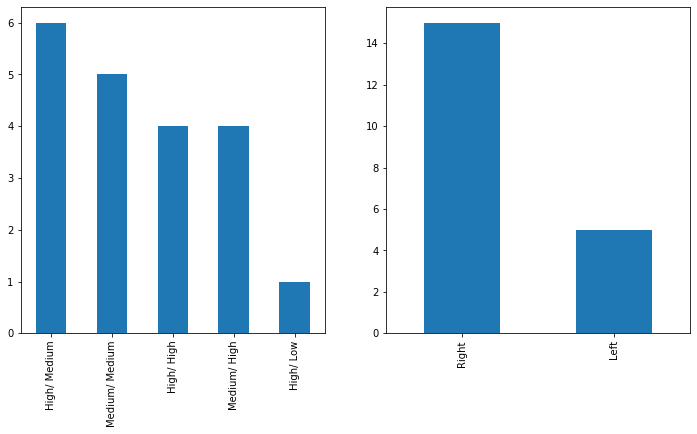

In [282]:
f,ax = plt.subplots(1,2,figsize=(12,6))
top_20_overall['Work Rate'].value_counts().plot(kind = 'bar',ax = ax[0])
top_20_overall['Preferred Foot'].value_counts().plot(kind = 'bar',ax = ax[1])


* Work rate says about attack and defence score of players. Around 5 all rounders are present in top 20.
* Also few left-footed players are present which gives an additional strength.

##### Average fare for each postion

As a team, Position of a player plays vital role. Let us generate a table with __top 5 players__ respect to each position.

In [283]:
fifa_1 = fifa.copy()

In [284]:
fifa_1 = fifa_1.sort_values(['Position','Overall'],ascending = [True,False]).groupby('Position').head(5) 

In [285]:
fifa_1 = fifa_1.loc[fifa_1['Position']!= 'NA',:] 

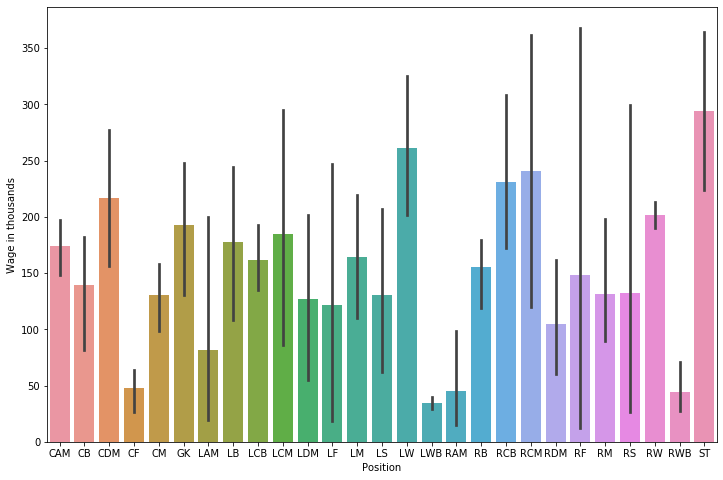

In [286]:
plt.figure(figsize = (12,8))
sns.barplot('Position','Wage in thousands',data = fifa_1)


* The average wage based on each position of the players is shown above. 
* This will be helpful for seeking average fare of top 20 players  with respect to their positions.
* It seems players who play at position 'ST','LW' have more average fare. Similarly, 'LWB','RWB','RAM' seeks very low average wage. 

##### Release clause  vs Value of top 20 players

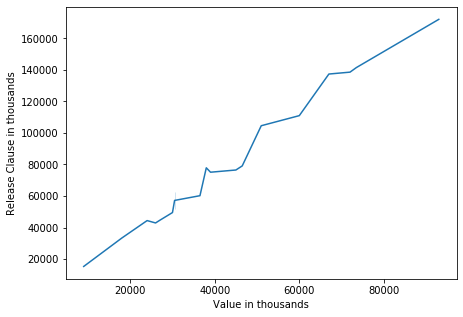

In [311]:
plt.figure(figsize = (7,5))
sns.lineplot(top_20_overall['Value in thousands'],top_20_overall['Release Clause in thousands'])


* The release clause of the top 20 players is almost twice that of the existing value.

#### Overall rating of top 20 players

##### Rating vs (wage and release clause)

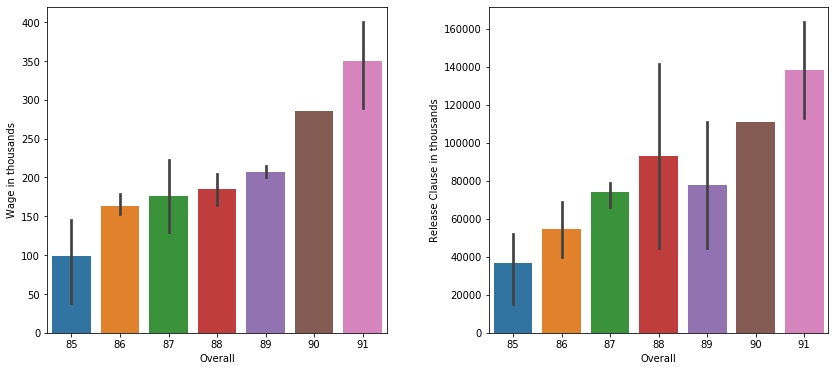

In [325]:
f,ax = plt.subplots(1,2,figsize = (14,6))
plt.subplots_adjust(wspace = 0.3)  
sns.barplot('Overall','Wage in thousands',data = top_20_overall,ax = ax[0])
sns.barplot('Overall','Release Clause in thousands',data = top_20_overall,ax = ax[1])

Release clause and wage plays very important role as the club should be able to manage the expeneses.

* Wage increases with increase in overall score and also release clause. 
* There is a huge difference in terms of money when compared to score 85 and 91. 
* players who have score of 85 seems to have average release clause of '35000K' where players with score of 91 have '13000K'.

##### Rating vs position

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

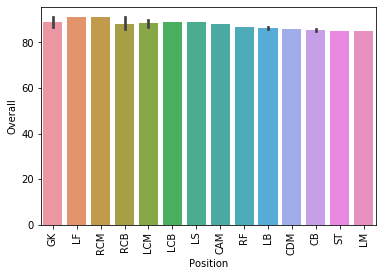

In [335]:
sns.barplot(y = 'Overall',x = 'Position',data = top_20_overall)
plt.xticks(rotation = 90)

* All the selected top 20 players who plays in the respective positions have very good ratings.

#### Rating vs work rate

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

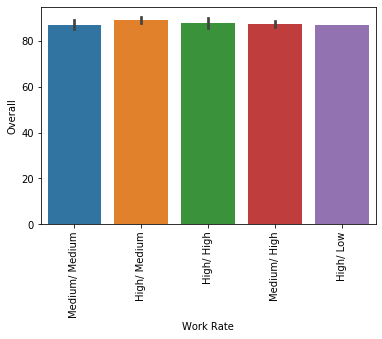

In [340]:
sns.barplot(y = 'Overall',x = 'Work Rate',data = top_20_overall)
plt.xticks(rotation = 90)

* The average rating of work rate also seems to be good.

### Conclusion:

The aim of selection of top 20 players for the newly formed club comes to an end.

From the analysis, I would like to conclude that

* Overall rating plays a key role in selecting the players.
* Selected top 20 players with respect to overall score have mostly unique positions which helps in team formation.
* All the selected players contract ends in 2020. 
* The work rate of the players seem to be good. 
* There are few left-footers which is added advantage for the team.
* As overall score increase , the values of 'Value','Wage','Release Clause' also increases.
* In terms of budget,management should be careful while making decisions.

This is an attempt to help the management to select top 15 players from the given set of players. Yet a lot of newer insights still can be gained on further exploration of the data.